# SysML v2 MBSE Methodologies JupyterBook<a name="sysmlv2modmethodologies"></a>

*Last update: May 26th, 2022*

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

* [SYSMOD with SysML v2](#sysmlv2sysmod)
  * [Problem Statement, System Idea and System Objectives](#sysmlv2sysmodproblemideaobjectives)
  * [Base Architecture](#sysmlv2sysmodba)
  * [SYSMOD Language Extension Library](#sysmodlibrary)
  * [The Complete FFDS System Example](#sysmlv2ffds)
  
* [FAS with SysML v2](#sysmlv2fas)
* [VAMOS (Variant Modeling with SysML v2](#sysmlv2vamos)

## How to use this notebook

First, execcute the [SYSMOD library](#sysmodlibrary) before use execute the examples. The library is used by all of them.


## SYSMOD with SysML v2<a name="sysmlv2sysmod"></a>

The example is taken from the book [SYSMOD - The Systems Modeling Toolbox](https://leanpub.com/sysmod). It is a Forest Fire Detection System (FFDS).

The following will be part of the next edition of the SYSMOD book which will cover SysML v2.


### Problem Statement, System Idea and System Objectives<a name="sysmlv2sysmodproblemideaobjectives"></a>

The language extension of SysML v2 is still under development. Until it is available, I use a simplified approach to introduce SYSMOD concepts into the language. 

In [7]:
package ForestFireDetectionSystemModel {   
    
    // Import the SYSMOD language extensions
    import SYSMOD::*;

    package FFDS_Core {
        doc /* The Core package contains elements 
            * that are valid for all system configurations
            */
        #system ffds {
            attribute redefines problemStatement = "How can we  [...]";
            attribute redefines systemIdea = "The FFDS is a  [...]";
        }
     }
 
    package FFDS_Objectives {
        #systemObjective <'OBJ-B1'> 'Market Leader' {
            doc /* The system will make the vendor the market 
                 * leader for forest fire detection systems.
                 */
        }
        #systemObjective <'OBJ-S1'> 'Reliable Detection' {
             doc /* Any forest fire is detected by the system on time 
                  * to start effective counteractions.
                  */
        }
        #systemObjective <'OBJ-S2'> 'Affordability' {
              doc /* The system is affordable for any forest authority. */
        }                               
    }
    
    package FFDS_Variants;
    package FFDS_Configurations {
        package FFDS_StandardEdition {
            #system ffdsStandardEdition :> FFDS_Core::ffds;
        }
    }
}

Package ForestFireDetectionSystemModel (0dd4b4f5-f38b-42a5-a1f7-e5cbc91173be)


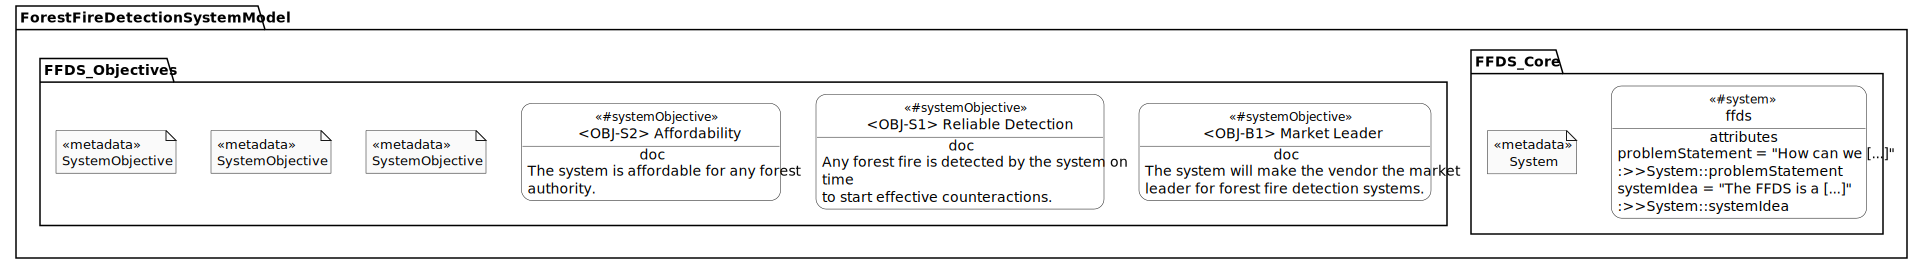

In [4]:
%viz ForestFireDetectionSystemModel

### Base Architecture<a name="sysmlv2sysmodba"></a>

The base architecture of the FFDS includes a base context.

In [8]:
package FFDS_BaseArchitecture {
    doc /* Base Architecture of the 
         * SYSMOD Forest Fire Detection System (FFDS)
         */
  
  import SYSMOD::*;
  
  #systemContext ffds_BaseArchitectureContext {          

   // External entities
   #externalObject animals[1..*];
   connect animals to ffds_BaseArchitecture.animalPort;
   #externalObject environment;
   #externalSystem satellites [1..*];
   #environmentalEffect fire;      
   connect satellites to ffds_BaseArchitecture.satPort;

   // Base Architecture		
   #system ffds_BaseArchitecture :> systemOfInterest {
     part forestFireObservationDrones[1..*];
     part sensors[1..*];
     part animalMovementSensors[1..*] :> sensors {
        port animalPort;
     }  
     part server {
         port satPort;
     }
     
     port animalPort;
     bind animalPort = animalMovementSensors.animalPort;
    
     port satPort;
     bind satPort = server.satPort;
   }
  }
}

Package FFDS_BaseArchitecture (f3abe89e-9929-40e7-9521-1f2a1c776f00)


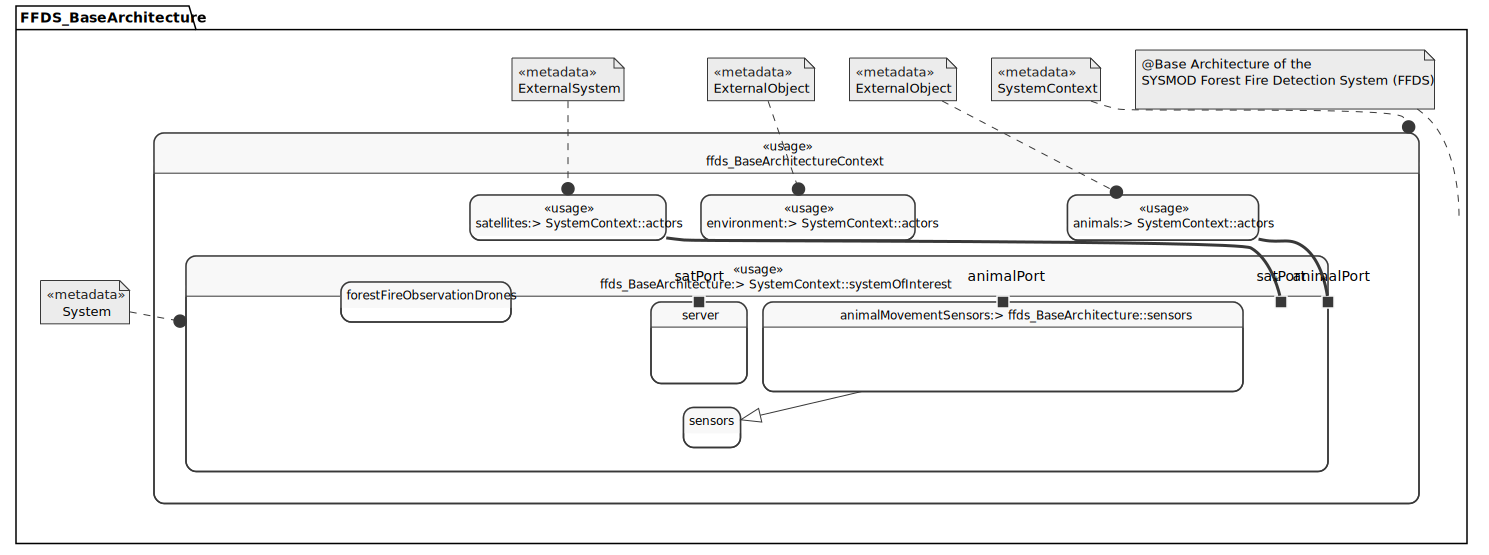

In [11]:
%viz --view=interconnection FFDS_BaseArchitecture

### System Context<a name="ffdsSystemContext"></a>

In [18]:
package FFDS_SystemContext {
    
    import FFDS_BaseArchitecture::*;
    
    #systemContext ffds_SystemContext :> ffds_BaseArchitectureContext {
        #system ffds :>> ffds_BaseArchitecture {
          port fireDepartmentPort : ~fireDepartmentSystem::FireDepartmentPort;
        }
    
        #user operator;
        #externalSystem <'fire department system'> fireDepartmentSystem {
            port alertPort : FireDepartmentPort;
            port def FireDepartmentPort {
              in item alert : ForestFireAlarm;
            }
            item def ForestFireAlarm {
                attribute dateTime;
                attribute fireLocation;
                attribute peopleAtRisk : ScalarValues::Boolean;
            }
        }
        flow of fireDepartmentSystem::ForestFireAlarm from ffds.fireDepartmentPort to fireDepartmentSystem.alertPort;

    #externalSystem <'meteorology data system'> metDataSystem;
    #environmentalEffect weather;
    #environmentalImpact <'planet environment'> planetEnvironment;
    }
    
}


Package FFDS_SystemContext (90f2ce2e-18cd-4aed-ba53-d4b0b5ad3d36)


### Stakeholder<a name="ffdsStakeholder"></a>

In [43]:
package FFDS_Stakeholder {
    
    import SYSMOD::**;
    
    #stakeholderEx 'CEO Vendor FFDS' {
        doc /* The CEO of the company that develops the FFDS. */
        
        :>> priority = PriorityKind::Critical;
        :>> effort = EffortKind::Low;
        :>> categories = (StakeholderCategoryKind::RequirementOwner);
        :>> contact = "Phone number: +1 ...";            
    }
    #stakeholderEx 'Fire Department Expert' {
        doc /* An expert from a fire department who is familiar with fighting forest fires. */
        
        :>> priority = PriorityKind::Critical;
        :>> effort = EffortKind::Medium;
        :>> categories = (StakeholderCategoryKind::Expert);
        :>> contact = "Email: joe@smith.com";  
    }
    #stakeholderEx 'Forest Authority Expert' {
        doc /* An expert from the forest authority who is familiar with managing forest fires. */
        
        :>> priority = PriorityKind::High;
        :>> effort = EffortKind::Low;
        :>> categories = (StakeholderCategoryKind::Expert);
        :>> contact = "Phone number: +1 ...";
    }
    #stakeholderEx 'Human Kind' {
        doc /* The influence of the system on the planet is of interest to human kind. */
        
        :>> priority = PriorityKind::Medium;
        :>> effort = EffortKind::Medium;
        :>> categories = (StakeholderCategoryKind::Other);
    }
    #stakeholderEx 'Meteorology Expert' {
        doc /* Expert for the capabilities of the meteorology system and the meteorology itself. */
        
        :>> priority = PriorityKind::Medium;
        :>> effort = EffortKind::Medium;
        :>> categories = (StakeholderCategoryKind::Expert);
    }
    #stakeholderEx 'Research Institute' {
        doc /* Organization that is responsible for the Research Analysis System. */
        
        :>> priority = PriorityKind::Low;
        :>> effort = EffortKind::Medium;
        :>> categories = (StakeholderCategoryKind::Expert);
    }
    #stakeholderEx 'Maintenance' {
        doc /* Technician of the service department of the operator of the FFDS. */
        
        :>> categories = (StakeholderCategoryKind::User);        
    }
    #stakeholderEx 'Operator' {
        doc /* User of the FFDS in the monitoring and central center. */
        
        :>> categories = (StakeholderCategoryKind::User);
    }    
    #stakeholderEx 'Forest Ranger';    
    
    concern BestSystem {
        doc /* The CEO wants to build the best FFDS of the world 
            *  to be the market leader for FFDS.
            */
        stakeholder 'CEO Vendor FFDS';
    }
}

Package FFDS_Stakeholder (5fd5c0a4-750c-4e78-b422-a245e15bdaaa)


In [41]:
%show FFDS_Stakeholder::BestSystem

ConcernUsage BestSystem (f7b3a1b4-ac2c-492a-8e36-6b250801b2cf)
  [ReturnParameterMembership] ReferenceUsage result (dfdf71f5-06dc-4fa6-8fe0-9048ae9d1868)


### System Use Cases<a name="ffdsusecases"></a>

### Use Case Activities

### Domain Model

### Quality Requirements

### Logical Architecture 

In [9]:
package FFDS_LogicalArchitecture {
    
    import SYSMOD::**;
    import ForestFireDetectionSystemModel::FFDS_Core::*;

    #system forrestObservationDrone_Logical :> ffds {
        part engine1 : DroneEngine {
            attribute redefines prop = PropKinds::clockwise;
        }
        part engine2 : DroneEngine {
            attribute redefines prop = PropKinds::counterclockwise;
        }
        part engine3 : DroneEngine {
            attribute redefines prop = PropKinds::clockwise;
        }        
        part engine4 : DroneEngine {
            attribute redefines prop = PropKinds::counterclockwise;
       }
    }
    part def DroneEngine {
        attribute prop : PropKinds;
    }
    enum def PropKinds {
        enum clockwise;
        enum counterclockwise;
    }        
}

Package FFDS_LogicalArchitecture (4cf6bbf4-3da9-4111-8eed-1d20cdc7f7cd)


### Product Architecture

### System States

### Verify Architecture with Scenarios

### Test Cases

### SYSMOD Language Extension Library<a name="sysmodlibrary"></a>

In [5]:
library package SYSMOD {
      
  doc /* SYSMOD - The Systems Modeling Toolbox, Version 5.0beta, Language Extension for SysML v2
       *
       * Copyright 2022 MBSE4U, Tim Weilkiens
       *
       * Licensed under the Apache License, Version 2.0 (the "License");
       * you may not use this file except in compliance with the License.
       * You may obtain a copy of the License at
       *
       * http://www.apache.org/licenses/LICENSE-2.0
       *
       * Unless required by applicable law or agreed to in writing, software
       * distributed under the License is distributed on an "AS IS" BASIS,
       * WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
       * See the License for the specific language governing permissions and
       * limitations under the License.
       *
       */ 

    package SYSMODConcepts {
        doc /*
             *  Definition of the SYSMOD concepts 
             */ 

        part def System {
            doc /* Represents an engineered system. */
            
            attribute problemStatement : ScalarValues::String;
            attribute systemIdea : ScalarValues::String;
            
            port systemPorts[*];
        }
        part systems[*] : System;   

        requirement def Objective {
            doc /* A objective is an objective of the system. 
                 * It is a special kind of a requirement that is typically not satisfied 
                 * but is targeted by the system.
                */
        }
        requirement objectives[*] : Objective;

        item def SystemContext {
            doc /* A system context is a wrapper around the system 
                 * and it's actors to allow a detailed system context 
                 * modeling.  
                 */

            #system systemOfInterest;
            #systemActor :>> systemActors;
            connection systemActorConnection : ContextConnection
                connect systemOfInterest.systemPorts to systemActors.actorPort;

            #user :>> users;
            #externalSystem :>> externalSystems;
            #mechanicalSystem :>> mechanicalSystems;
            #externalObject :>> externalObjects;
            #environmentalEffect :>> environmentalEffects; 
            #environmentalImpact :>> environmentalImpacts;
        }
        item systemContexts[*] : SystemContext;
      
        connection def ContextConnection {
            end systemPort;
            end actorPort;
        }

        // Actor categories
        item def SystemActor {
            port actorPort[*];
        }
        item systemActors[*] : SystemActor;
        item def User :> SystemActor;
        item users[*] : User :> systemActors; 
        item def ExternalSystem :> SystemActor;
        item externalSystems[*] : ExternalSystem :> systemActors;
        item def MechanicalSystem :> ExternalSystem;
        item mechanicalSystems[*] :> externalSystems :> systemActors;
        item def ExternalObject :> SystemActor;
        item externalObjects[*] : ExternalObject :> systemActors;
        item def EnvironmentalEffect :> SystemActor;
        item environmentalEffects[*] : EnvironmentalEffect :> systemActors;
        item def EnvironmentalImpact :> SystemActor;
        item environmentalImpacts[*] : EnvironmentalImpact :> systemActors;

    use case def SystemUseCase {
      doc /* The System Use Cases are a table of content of the services provided by the system to its system actors. 
           * A system use case describes a coherent interaction of an actor with the system. The interaction is initiated 
           * by a trigger. The use case returns a result that is of value for an actor or stakeholder of the system.
           */
    
        attribute useCasetrigger : ScalarValues::String;
        attribute useCaseResult : ScalarValues::String;
    }
    use case systemUseCases[*] : SystemUseCase;
    
    use case def ContinuousUseCase :> SystemUseCase {
      doc /* A continuous use case is a special system use case that, typically, is triggered by a state switch of the 
           * system, but could also have an external trigger. It has no final result, but continuous results. 
           */
    }
    use case continuousUseCases[*] : ContinuousUseCase;     

    action def SystemProcess {
        doc /* The system process describes the logical execution sequence of use cases */
    } 
    action systemProcesses[*] : SystemProcess;
    
     
   item def DomainItem {
       doc /* A domain items represents an object, a concept, a location, 
            * or a person from the real-world domain. A domain item is directly known to the system.
            */ 
   }
   item domainItems[*] : DomainItem;
   
   port def UserInteractionPoint {
     doc /* The user interaction point contains features which describe the communication with a (human) user. 
          * The concept emphasizes the special character of the interface in relation to more technical interfaces.
          */
   }
   port userInteractionPoints[*] : UserInteractionPoint;

    item def StakeholderExtended {
        attribute priority : PriorityKind;
        attribute effort : EffortKind;
        attribute focusPriority : ScalarValues::Integer = priority.level * effort.level;
        attribute categories[1..*] : StakeholderCategoryKind;
        attribute contact : ScalarValues::String;
    }

    attribute def PriorityLevels {
        attribute level : ScalarValues::Integer;
    }
    enum def PriorityKind :> PriorityLevels {
        enum Critical {
            :>> level = 4;
        }
        enum High {
            :>> level = 3;
        }
        enum Medium {
            :>> level = 2;
        }
        enum Low {
            :>> level = 1;
        }
    }
    enum def EffortKind :> PriorityLevels {
        enum Extreme {
            :>> level = 4;
        }
        enum High {
            :>> level = 3;
        }
        enum Medium {
            :>> level = 2;
        }
        enum Low {
            :>> level = 1;
        }
    }
    enum def StakeholderCategoryKind {
        enum Expert;
        enum RequirementOwner;
        enum User;
        enum Other;
    }
    item stakeholdersEx[*] : StakeholderExtended;
            
  }
 
    //
    // Language Extensions of the SYSMOD concepts
    //
    metadata def <systemObjective> SystemObjective :> Metaobjects::SemanticMetadata {
      :>> baseType = SYSMODConcepts::objectives meta SysML::Usage;
     }

    metadata def <system> System :> Metaobjects::SemanticMetadata {
         :>> baseType = SYSMODConcepts::systems meta SysML::Usage;   	
     }

    metadata def <systemContext> SystemContext :> Metaobjects::SemanticMetadata {
        :>> baseType = SYSMODConcepts::systemContexts meta SysML::Usage;
     }

  metadata def <systemActor> SystemActor :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::systemActors meta SysML::Usage;    	
  }
  metadata def <user> User :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::users meta SysML::Usage;    	
  }
  metadata def <externalSystem> ExternalSystem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::externalSystems meta SysML::Usage;    	
  }
  metadata def <mechanicalSystem> MechanicalSystem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::mechanicalSystems meta SysML::Usage;    	
  }
  metadata def <externalObject> ExternalObject :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::externalObjects meta SysML::Usage;    	
  }
  metadata def <environmentalEffect> EnvironmentalEffect :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::environmentalEffects meta SysML::Usage;    	
  }
  metadata def <environmentalImpact> EnvironmentalImpact :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::environmentalImpacts meta SysML::Usage;    	
  }
  metadata def <systemUseCase> SystemUseCase :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::systemUseCases meta SysML::Usage;    	
  }
  metadata def <continuousUseCase> ContinuousUseCase :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::continuousUseCases meta SysML::Usage;    	
  }
  metadata def <systemProcess> SystemProcess :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::systemProcesses meta SysML::Usage;    	
  }
  metadata def <domainItem> DomainItem :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::domainItems meta SysML::Usage;    	
  }
  metadata def <userInteractionPoint> UserInteractionPoint :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::userInteractionPoints meta SysML::Usage;    	
  }
  metadata def <stakeholderEx> StakeholderExtended :> Metaobjects::SemanticMetadata {
    :>> baseType = SYSMODConcepts::stakeholdersEx meta SysML::Usage; 
  }
    
}

LibraryPackage SYSMOD (75315066-9988-486b-896a-e0bc008859eb)


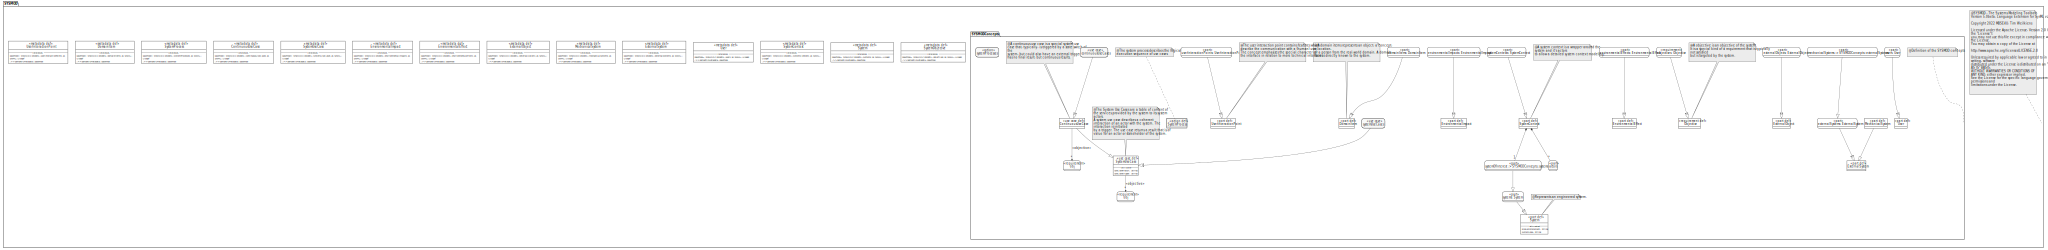

In [2]:
%viz SYSMOD

### The Complete FFDS System Example<a name="sysmlv2ffds"></a>

Below you find the complete example in a single code section.

In [17]:
package ForestFireDetectionSystemModel {   

    import SYSMOD::*;
        
    package FFDS_BaseArchitecture {
        doc /* Base Architecture of the 
             * SYSMOD Forest Fire Detection System (FFDS)
             */
        import SYSMOD::*;
  
        #systemContext ffds_BaseArchitectureContext {          
            // External entities
            #externalObject animals[1..*] :> actors;
            connect animals to ffds_BaseArchitecture.animalPort;
            #externalObject environment :> actors;
            #externalSystem satellites [1..*] :> actors;
            connect satellites to ffds_BaseArchitecture.satPort;

            // Base Architecture
            #system ffds_BaseArchitecture :> systemOfInterest {
                 part forestFireObservationDrones[1..*];
                 part sensors[1..*];
                 part animalMovementSensors[1..*] :> sensors {
                     port animalPort;
                 }    
                 part server {
                    port satPort;
                 }
     
                 port animalPort;
                 bind animalPort = animalMovementSensors.animalPort;

                 port satPort;
                 bind satPort = server.satPort;	 
            }
        }
    }
    
    package FFDS_Core {

        #system ffds {
            attribute redefines problemStatement = "How can we  [...]";
            attribute redefines systemIdea = "The FFDS is a  [...]";
        }
    }
 
    package FFDS_Objectives {
        #systemObjective <'OBJ-B1'> 'Market Leader' {
            doc /* The system will make the vendor the market 
                * leader for forest fire detection systems.
                */
        }
        #systemObjective <'OBJ-S1'> 'Reliable Detection' {
            doc /* Any forest fire is detected by the system on time 
                * to start effective counteractions.
                */
        }
        #systemObjective <'OBJ-S2'> 'Affordability' {
            doc /* The system is affordable for any forest authority. */
        }
    }
}


Package ForestFireDetectionSystemModel (735723e1-175c-4b17-ad07-8d5b3a3287be)


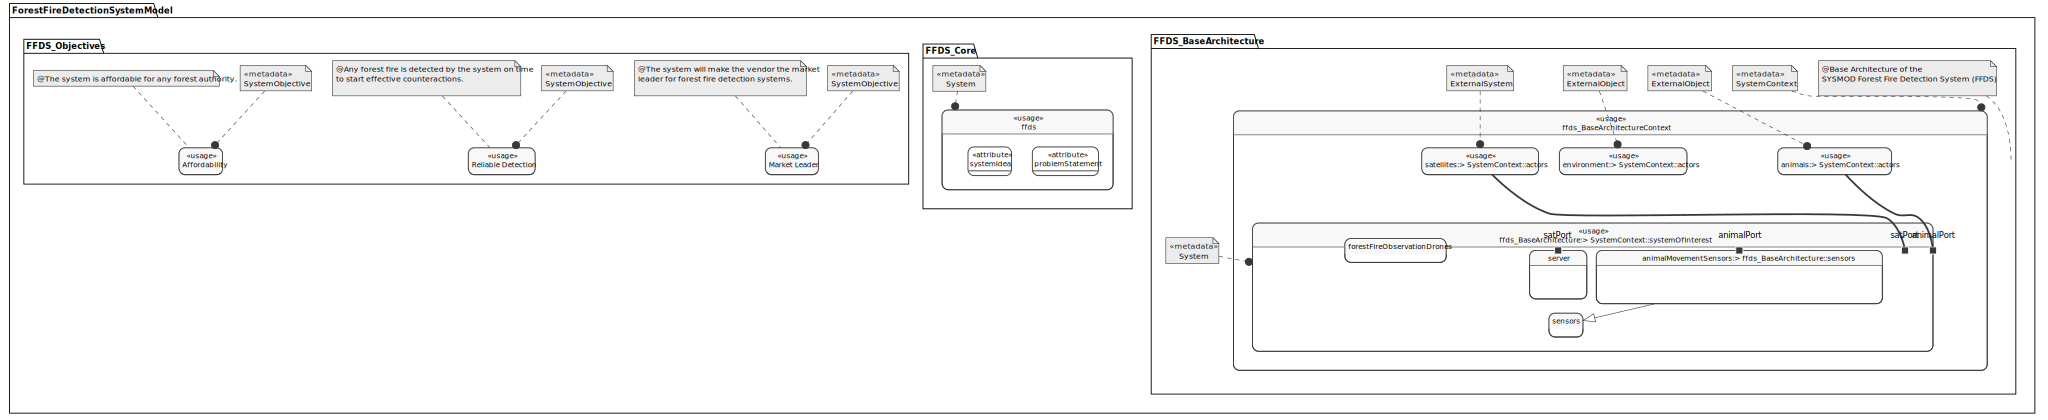

In [18]:
%viz ForestFireDetectionSystemModel